### 1. **Метод Тихонова (Ridge Regression)**

Формула метода Тихонова:

$$
\hat{\beta} = \arg\min_{\beta} \left( \| Y - X\beta \|^2 + \lambda \|\beta\|^2 \right)
$$

где:
- $ Y $ — вектор наблюдаемых значений,
- $ X $ — матрица признаков,
- $ \beta $ — вектор коэффициентов,
- $ \lambda $ — коэффициент регуляризации.

**Суть**: Метод Тихонова (или гребневая регрессия) минимизирует сумму квадратов отклонений модели от реальных данных и штрафует большие значения коэффициентов $\beta$ с помощью второго слагаемого. Это помогает уменьшить переобучение, удерживая модель от слишком сложных решений, которые могут подгонять шум в данных.

---

### 2. **Метод LASSO (Least Absolute Shrinkage and Selection Operator)**

Формула метода LASSO:

$$
\hat{\beta} = \arg\min_{\beta} \left( \| Y - X\beta \|^2 + \lambda \|\beta\|_1 \right)
$$

где:
- $ \|\beta\|_1 $ — это сумма абсолютных значений коэффициентов $\beta$.

**Суть**: LASSO (L1-регуляризация) также минимизирует сумму квадратов ошибок, но вместо квадратичной нормы коэффициентов $\|\beta\|^2$ применяется L1-норма ($\|\beta\|_1$), что приводит к "сжатию" коэффициентов и может привести к их обнулению. Это позволяет одновременно не только снижать переобучение, но и выполнять автоматический отбор признаков, так как менее важные коэффициенты могут стать равными нулю.

In [313]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [314]:
# Создание признаков (задержки временного ряда)
def create_features(y, lag=5):
    X, y_new = [], []
    for i in range(lag, len(y)):
        X.append(y[i-lag:i])
        y_new.append(y[i])
    return np.array(X), np.array(y_new)

In [315]:
# Реализация регуляризации Тихонова (Ridge)
def ridge_regression(X, y, alpha):
    I = np.eye(X.shape[1])
    return np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y

In [316]:
# Реализация регуляризации LASSO
# Градиентный спуск для LASSO

def lasso_regression(X, y, alpha, iterations=1000, lr=0.001):
    beta = np.zeros(X.shape[1])
    for _ in range(iterations):
        gradient = -2 * X.T @ (y - X @ beta) + alpha * np.sign(beta)
        beta -= lr * gradient
    return beta

In [317]:
# Генерация синтетического временного ряда
np.random.seed(42)
t = np.linspace(0, 10, 1000)
y = np.sin(t) + 0.1 * np.random.normal(size=t.shape)  # Истинные данные

lag = 5
X, y_new = create_features(y, lag)

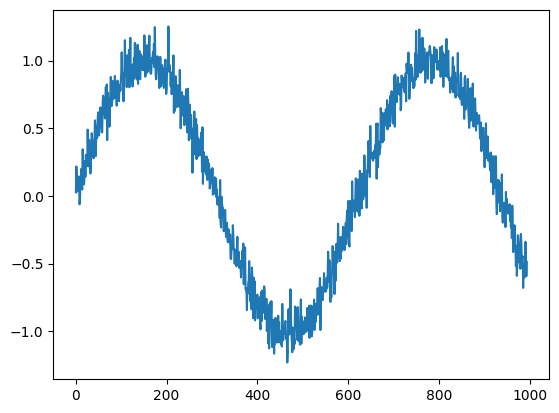

In [318]:
plt.plot(y_new)

In [319]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, shuffle=False)

# Сохранение X_train и y_train в файл
with open("x_train.txt", "w") as file:
    file.write(str(X_train.shape[0]) + "\n")
    file.write(str(X_train.shape[1]) + "\n")
    for row in X_train:
        file.write(" ".join(map(str, row)) + "\n")

# Сохранение X_train и y_train в файл
with open("y_train.txt", "w") as file:
    file.write(str(y_train.shape[0]) + "\n")
    for target in y_train:
        file.write(str(target) + "\n")

In [320]:
# Регуляризация Тихонова
ridge_coefficients = ridge_regression(X_train, y_train, alpha=1.0)
y_pred_ridge = X_test @ ridge_coefficients

# Регуляризация LASSO
lasso_coefficients = lasso_regression(X_train, y_train, alpha=0.1, lr=1e-4)
y_pred_lasso = X_test @ lasso_coefficients

In [321]:
print(ridge_coefficients)
print(lasso_coefficients)

[0.2190613  0.11838979 0.21498586 0.22037104 0.22633297]
[0.21669576 0.12738997 0.21392115 0.21833073 0.22318351]


In [322]:
# Оценка качества моделей
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print("MSE Ridge:", ridge_mse)
print("MSE LASSO:", lasso_mse)

MSE Ridge: 0.011416965432907034
MSE LASSO: 0.011402458778160911


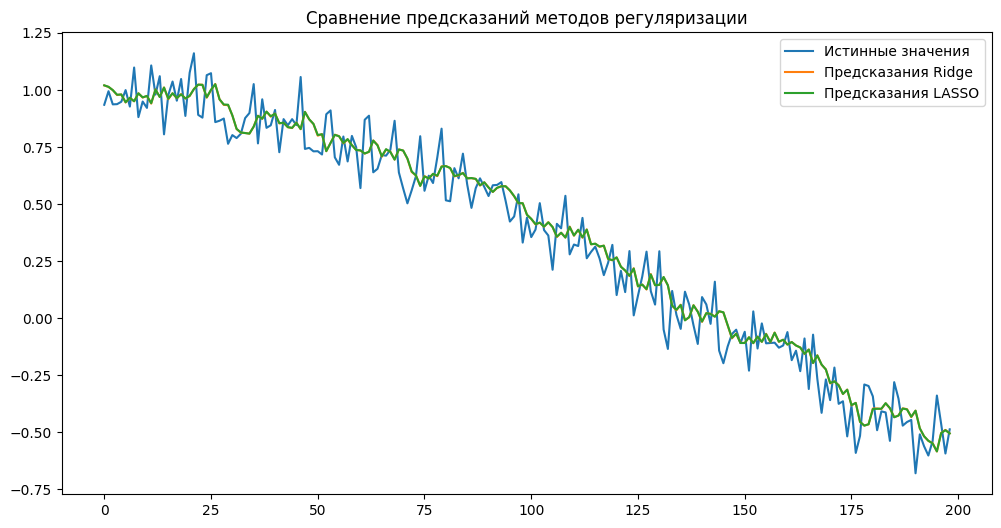

In [323]:
# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Истинные значения")
plt.plot(y_pred_ridge, label="Предсказания Ridge")
plt.plot(y_pred_lasso, label="Предсказания LASSO")
plt.legend()
plt.title("Сравнение предсказаний методов регуляризации")
plt.show()

MSE Ridge: 0.011576537575225782
MSE LASSO: 0.02142605418643575


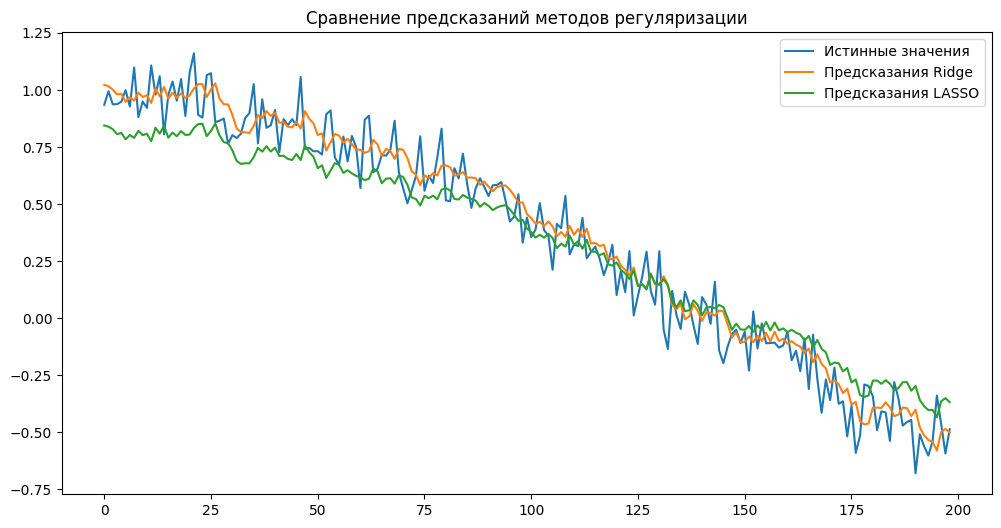

In [324]:
from sklearn.linear_model import Ridge, Lasso

# Регуляризация Тихонова (Ridge)
ridge_model = Ridge(alpha=1.0)  # alpha - параметр регуляризации
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Регуляризация LASSO
lasso_model = Lasso(alpha=0.1)  # alpha - параметр регуляризации
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Оценка качества моделей
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print("MSE Ridge:", ridge_mse)
print("MSE LASSO:", lasso_mse)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Истинные значения")
plt.plot(y_pred_ridge, label="Предсказания Ridge")
plt.plot(y_pred_lasso, label="Предсказания LASSO")
plt.legend()
plt.title("Сравнение предсказаний методов регуляризации")
plt.show()
